# Obesity Risk Prediction

This project is based on the Kaggle competition [Multi-Class Prediction of Obesity Risk](https://kaggle.com/competitions/playground-series-s4e2).

**Goal:** The goal of this project is to use various factors to predict obesity risk in individuals, which is related to cardiovascular disease.

**Dataset:** The dataset was generated from a deep learning model trained on the [Obesity or CVD risk](https://www.kaggle.com/datasets/aravindpcoder/obesity-or-cvd-risk-classifyregressorcluster) dataset. 
The data consist of the estimation of obesity levels among individuals from Mexico, Peru and Columbia aged 14 to 61 with diverse eating habits and physical conditions. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Import data

In [2]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [3]:
df_train.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [4]:
df_test.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,20758,Male,26.899886,1.848294,120.644178,yes,yes,2.938616,3.000000,Sometimes,no,2.825629,no,0.855400,0.000000,Sometimes,Public_Transportation
1,20759,Female,21.000000,1.600000,66.000000,yes,yes,2.000000,1.000000,Sometimes,no,3.000000,no,1.000000,0.000000,Sometimes,Public_Transportation
2,20760,Female,26.000000,1.643355,111.600553,yes,yes,3.000000,3.000000,Sometimes,no,2.621877,no,0.000000,0.250502,Sometimes,Public_Transportation
3,20761,Male,20.979254,1.553127,103.669116,yes,yes,2.000000,2.977909,Sometimes,no,2.786417,no,0.094851,0.000000,Sometimes,Public_Transportation
4,20762,Female,26.000000,1.627396,104.835346,yes,yes,3.000000,3.000000,Sometimes,no,2.653531,no,0.000000,0.741069,Sometimes,Public_Transportation


In [5]:
# Shape of the datasets
print('Train dataset: ', df_train.shape)
print('Test dataset: ', df_test.shape)

Train dataset:  (20758, 18)
Test dataset:  (13840, 17)


### Variable description

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

The dataset contains :
+ 8 numeric variables : 
    + `Age`
    + `Height` in m
    + `Weight` in kg
    + `FCVC` : Frequency of consumption of vegetables
    + `NCP` : Number of main meals
    + `CH20` : Consumption of water daily
    + `FAF` : Physical activity frequency
    + `TUE` : Time using technology devices
+ 9 non numeric variables : 
    + `Gender` : Male/Female
    + `family_history_with_overweight` : Family members suffered or suffers from overweight 
    + `FAVC` : Frequent consumption of high caloric food  
    + `CAEC` :  Consumption of food between meals
    + `SMOKE` : Smoker or not
    + `SCC` : Calories consumption monitoring
    + `CALC` : Consumption of alcohol 
    + `MTRANS` : Transportation used 
    + `NObeyesdad` : the variable to predict (Underweight/Normal/Overweight I/Overweight II/Obesity I/Obesity II/Obesity III)

### Null values

In [7]:
df_train.isnull().sum()

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [8]:
df_test.isnull().sum()

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
dtype: int64

There are no missing values in both the train and test datasets.

## Exploratory data analysis I

In [9]:
df_train = df_train.drop(columns = "id")

In [10]:
df_train.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000
mean,23.841804,1.700245,87.887768,2.445908,2.761332,2.029418,0.981747,0.616756
std,5.688072,0.087312,26.379443,0.533218,0.705375,0.608467,0.838302,0.602113
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,20.000000,1.631856,66.000000,2.000000,3.000000,1.792022,0.008013,0.000000
50%,22.815416,1.700000,84.064875,2.393837,3.000000,2.000000,1.000000,0.573887
75%,26.000000,1.762887,111.600553,3.000000,3.000000,2.549617,1.587406,1.000000
max,61.000000,1.975663,165.057269,3.000000,4.000000,3.000000,3.000000,2.000000


### Target variable NObeyesdad

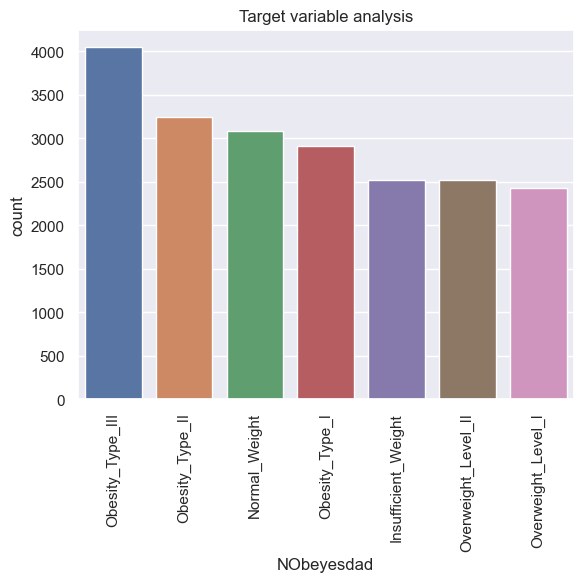

In [11]:
sns.set(style='darkgrid')
sns.countplot(x='NObeyesdad', data=df_train, order=df_train['NObeyesdad'].value_counts().index)
plt.xticks(rotation=90)
plt.title("Target variable analysis")
plt.show()

Obesity_Type_III is the most frequent class in the dataset.

### Categorical variables

In [12]:
categorical_cols = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']

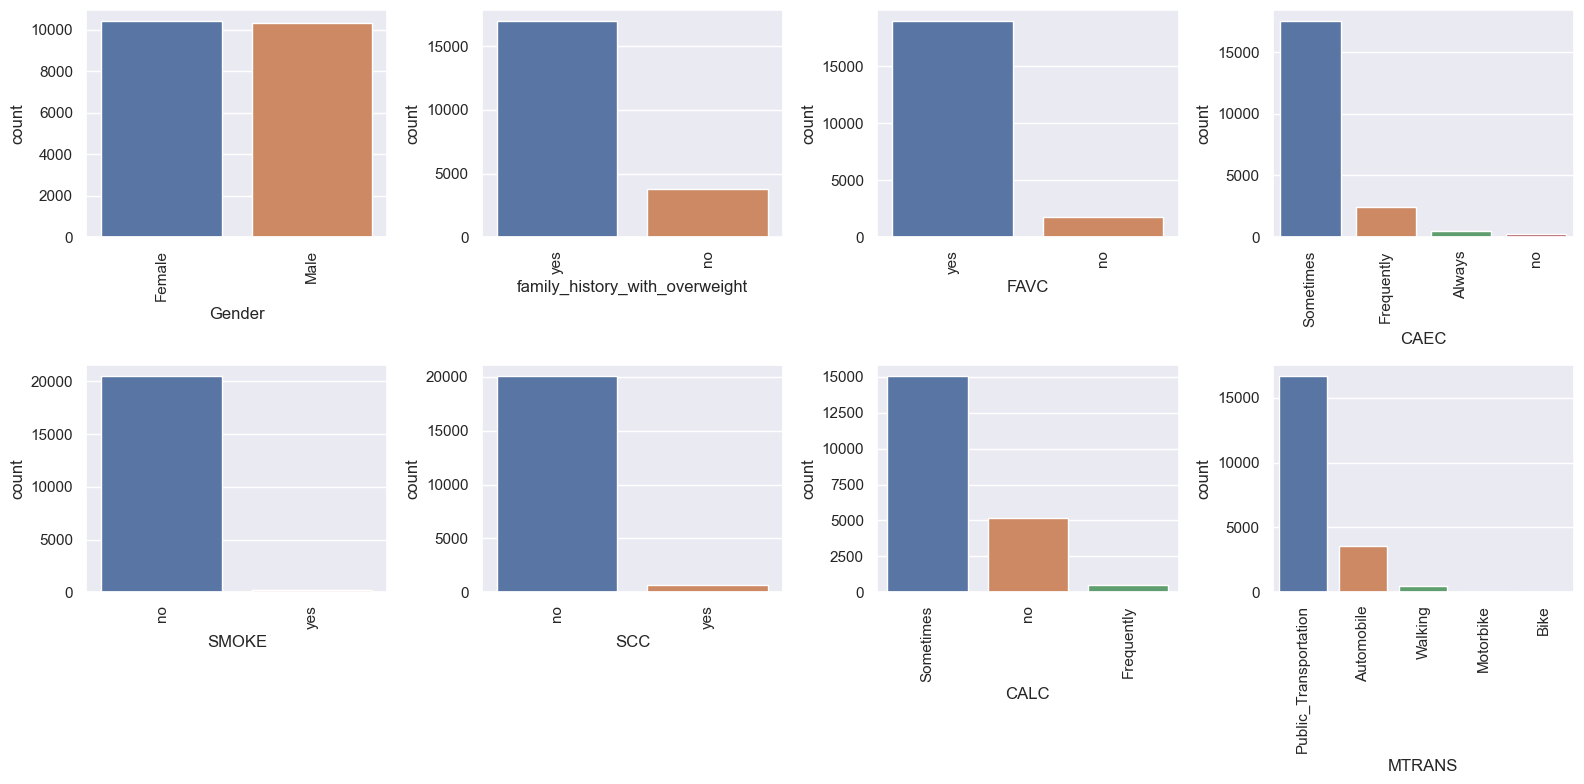

In [13]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))
axes = axes.flatten()
for i, var in enumerate(categorical_cols):
    sns.countplot(x=var, data=df_train, order=df_train[var].value_counts().index, ax=axes[i])
    axes[i].tick_params(axis='x', rotation=90) 
plt.tight_layout()
plt.show()

The gender distribution is quite balanced. However, the other categorical variables are highly imbalanced. 

### Numeric variables

In [14]:
numeric_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

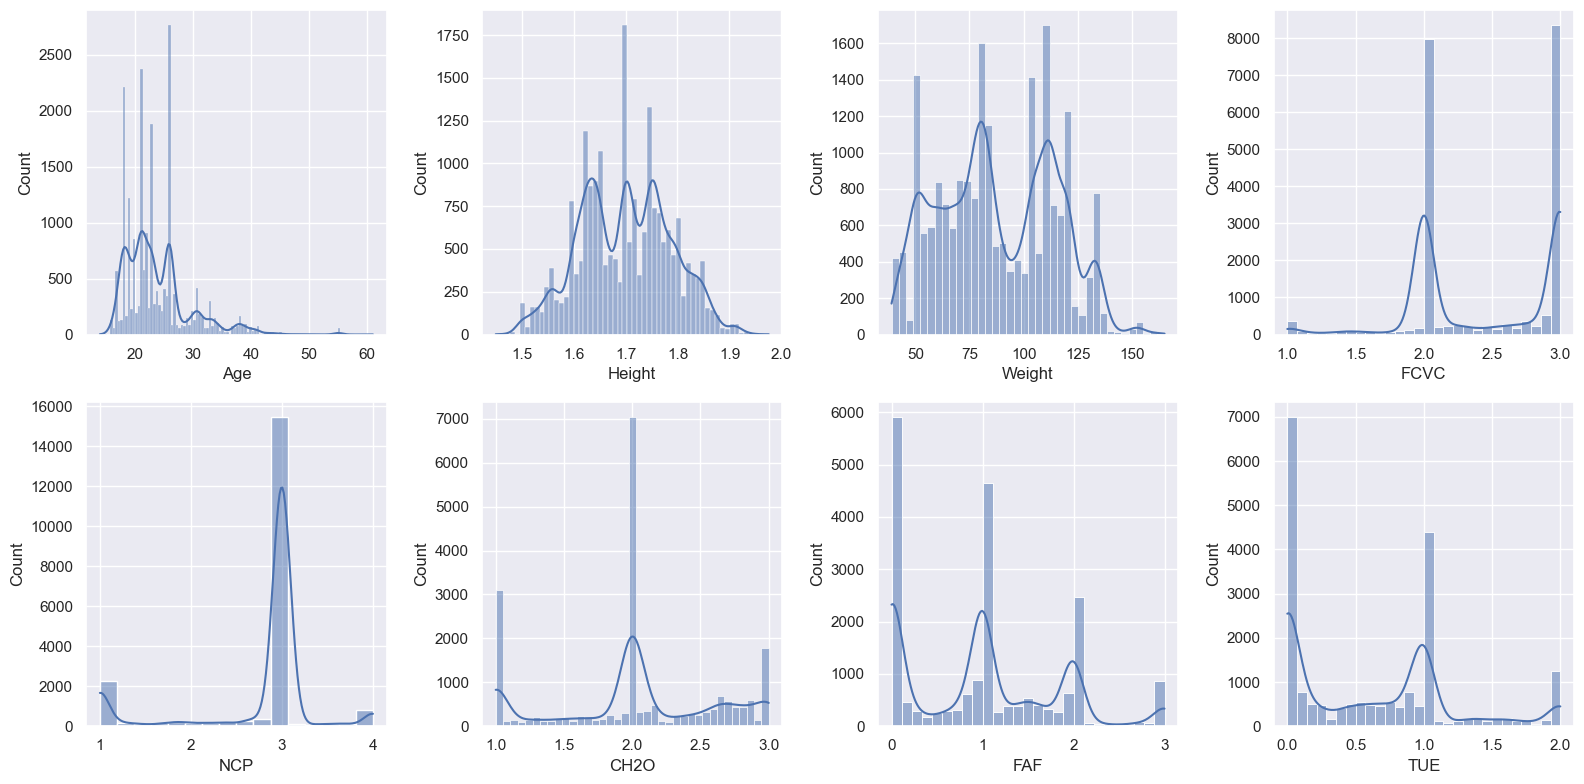

In [15]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))
axes = axes.flatten()
for i, var in enumerate(numeric_cols):
    sns.histplot(x=var, data=df_train, kde=True, ax=axes[i])
plt.tight_layout()
plt.show()

### Multivariate analysis

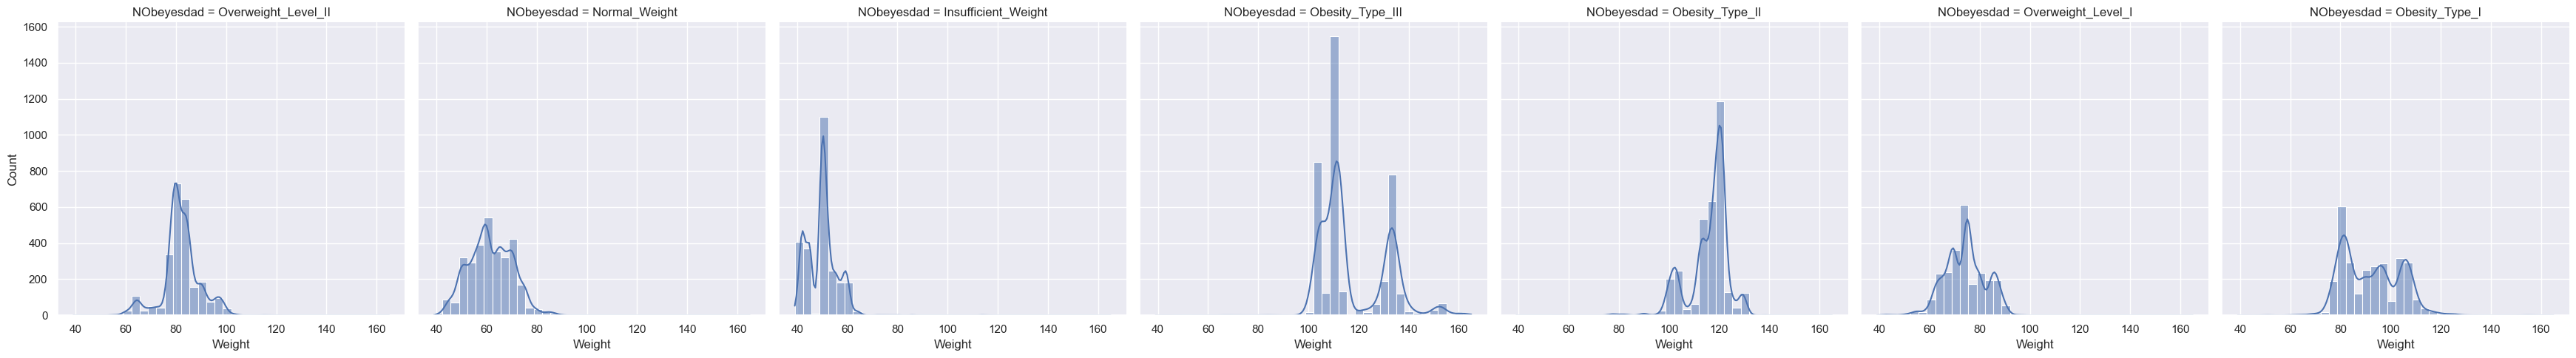

In [16]:
sns.displot(data=df_train, x="Weight", col="NObeyesdad", kde=True)
plt.show()

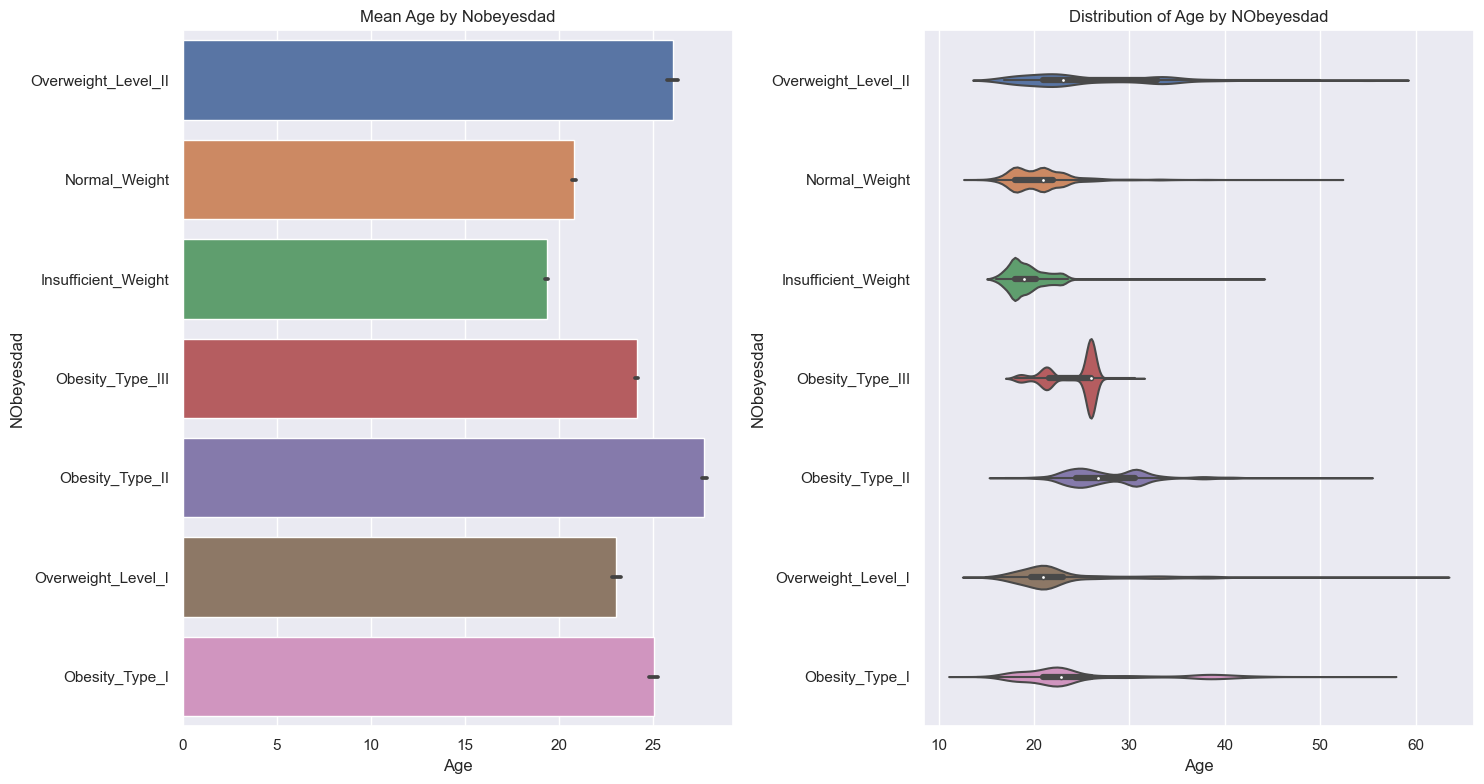

In [17]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 8))
sns.barplot(data=df_train, x='Age', y='NObeyesdad', ax=axes[0])
axes[0].set_title("Mean Age by Nobeyesdad")
sns.violinplot(data=df_train, x='Age', y='NObeyesdad', ax=axes[1])
axes[1].set_title("Distribution of Age by NObeyesdad")
plt.tight_layout()
plt.show()

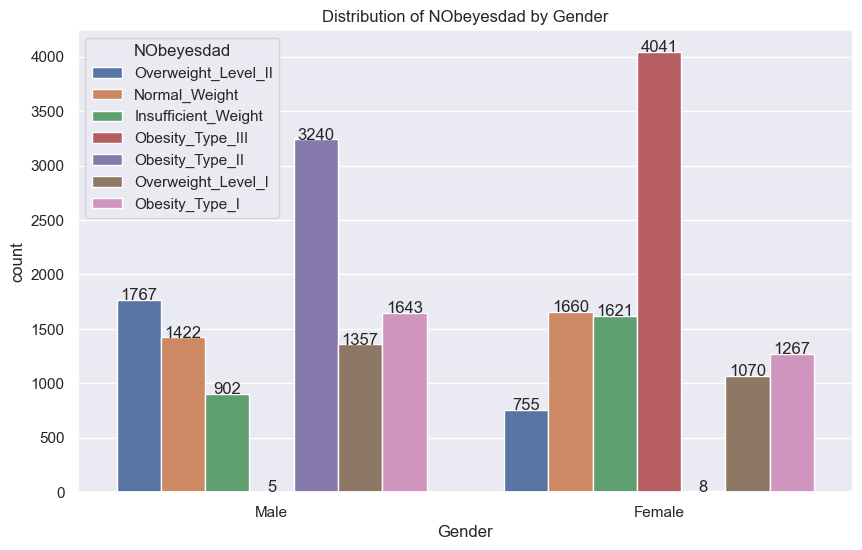

In [18]:
plt.figure(figsize=(10,6))
ax = sns.countplot(data=df_train, x='Gender', hue='NObeyesdad')
# Add counts on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.2, f'{int(height)}', ha="center")
plt.title("Distribution of NObeyesdad by Gender")
plt.show()

Obesity type II is most common among Males, while Obesity type III is most common among Females.

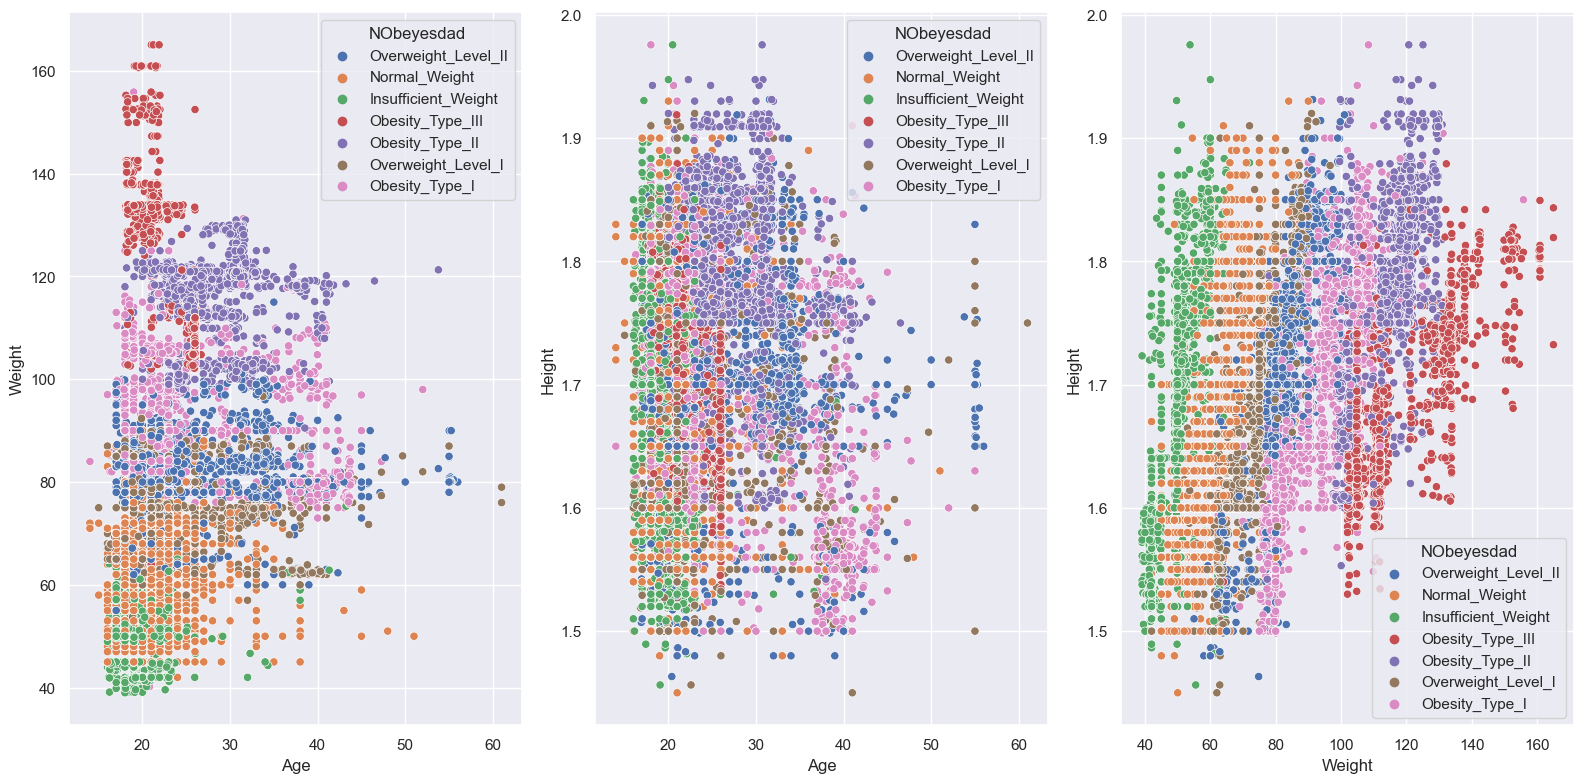

In [19]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 8))
sns.scatterplot(data=df_train, x='Age', y='Weight', hue='NObeyesdad', ax=axes[0])
sns.scatterplot(data=df_train, x='Age', y='Height', hue='NObeyesdad', ax=axes[1])
sns.scatterplot(data=df_train, x='Weight', y='Height', hue='NObeyesdad', ax=axes[2])
plt.tight_layout()
plt.show()

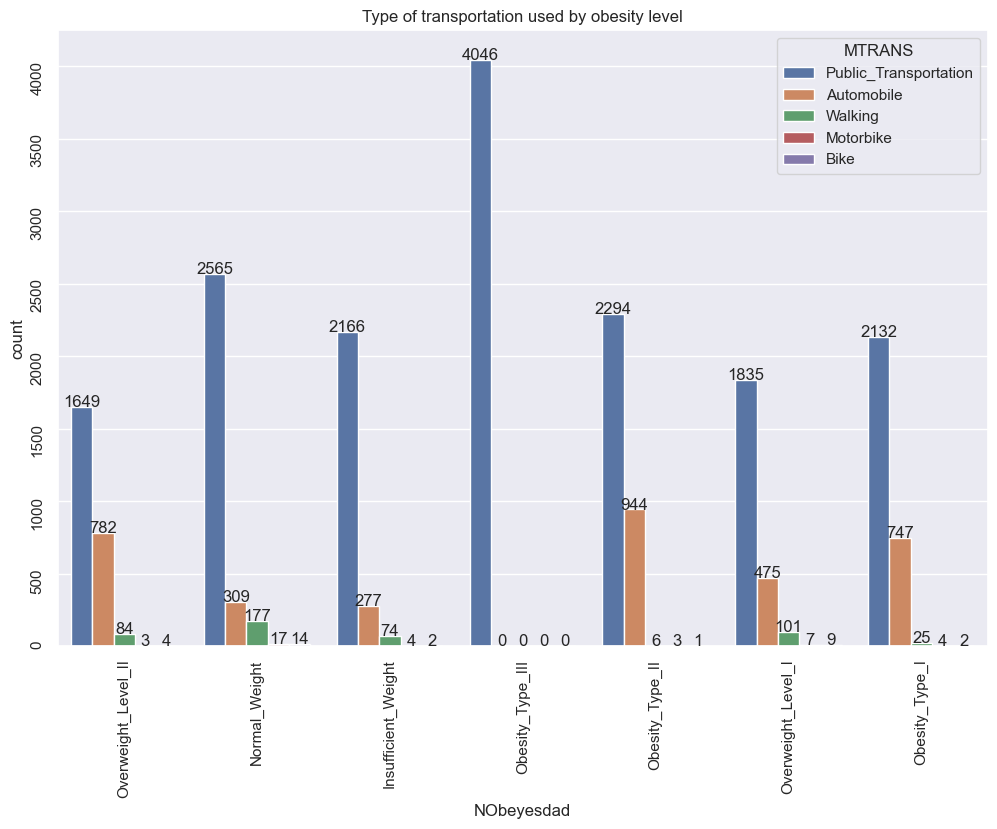

In [20]:
plt.figure(figsize=(12,8))
ax = sns.countplot(data=df_train, x='NObeyesdad', hue='MTRANS')
# Add counts on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.1, f'{int(height)}', ha="center")
plt.title("Type of transportation used by obesity level")
plt.tick_params(rotation=90)
plt.show()

People with obesity type II or type III rarely (never) walk or use bike to move, which shows their lack of physical activity.

## Feature engineering

### Encode target and categorical variables

In [21]:
# Encode target variable
dict = {'Insufficient_Weight': 0,
        'Normal_Weight': 1,
        'Overweight_Level_I': 2,
        'Overweight_Level_II': 3, 
        'Obesity_Type_I': 4, 
        'Obesity_Type_II': 5, 
        'Obesity_Type_III': 6}
df_train['NObeyesdad']= df_train['NObeyesdad'].map(dict)

In [22]:
def encode_categorical(data):
    data['Gender']= data['Gender'].map({'Male': 0, 'Female': 1})
    data['family_history_with_overweight'] = data['family_history_with_overweight'].map({'yes': 1, 'no': 0})
    data['FAVC'] = data['FAVC'].map({'no': 0, 'yes': 1,})
    data['SMOKE'] = data['SMOKE'].map({'no': 0, 'yes': 1,})
    data['SCC'] = data['SCC'].map({'no': 0, 'yes': 1,})
    data["CALC"] = data["CALC"].map({"no": 0, "Sometimes": 1, "Frequently": 2, "Always": 3})
    data["CAEC"] = data["CAEC"].map({"no": 0, "Sometimes": 1, "Frequently": 2, "Always": 3})
    data["MTRANS"] = data["MTRANS"].map({"Public_Transportation": 0, "Automobile": 1, "Walking": 2, "Motorbike": 3, "Bike": 4})
    return data

In [23]:
df_train = encode_categorical(df_train)

### Create new features

* `BMI` = Weight / (Height **2) [Body Mass Index]
* `WIR` = Weight / CH2O [Water Intake Ratio = Weight / Consumption of water daily]

In [24]:
def create_new_features(data):
    # BMI
    data['BMI'] = data['Weight'] / (data['Height'] ** 2)
    # Water Intake Ratio
    data['WIR'] = data['Weight'] / data['CH2O']
    return data

In [25]:
df_train = create_new_features(df_train)

In [26]:
df_train.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI,WIR
0,0,24.443011,1.699998,81.669950,1,1,2.000000,2.983297,1,0,2.763573,0,0.000000,0.976473,1,0,3,28.259565,29.552304
1,1,18.000000,1.560000,57.000000,1,1,2.000000,3.000000,2,0,2.000000,0,1.000000,1.000000,0,1,1,23.422091,28.500000
2,1,18.000000,1.711460,50.165754,1,1,1.880534,1.411685,1,0,1.910378,0,0.866045,1.673584,0,0,0,17.126706,26.259596
3,1,20.952737,1.710730,131.274851,1,1,3.000000,3.000000,1,0,1.674061,0,1.467863,0.780199,1,0,6,44.855798,78.417006
4,0,31.641081,1.914186,93.798055,1,1,2.679664,1.971472,1,0,1.979848,0,1.967973,0.931721,1,0,3,25.599151,47.376392


## Exploratory data analysis II

### Correlations

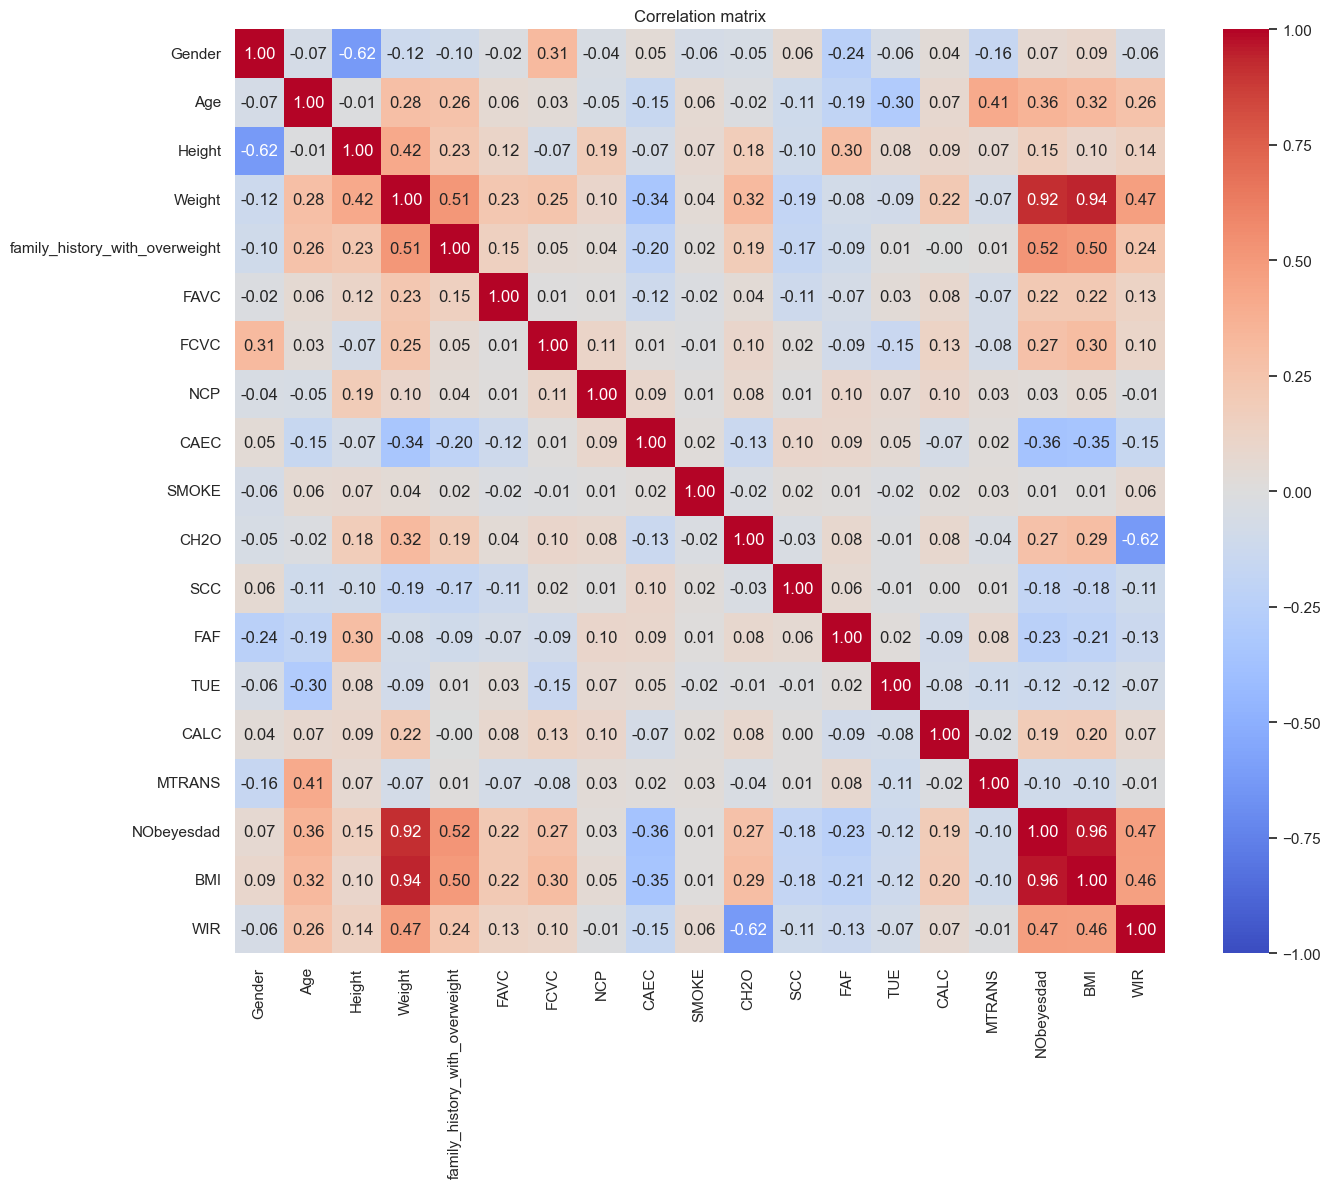

In [27]:
plt.figure(figsize=(15, 12))
corr_matrix=df_train.corr()
sns.heatmap(corr_matrix, annot=True, vmin=-1, vmax=1, fmt = ".2f", cmap = "coolwarm")
plt.title('Correlation matrix')
plt.show()

Variables positively correlated with the obesity level `NObeyesdad` (by order of importance):
* `BMI`
* `Weight`
* `family_history_with_overweight`
* `WIR` [Water Intake Ratio]
* `Age`
* `FCVC` [Frequency of consumption of vegetables]
* `CH2O` [Consumption of water daily]
* `FAVC` [Frequent consumption of high caloric food]
* `CALC` [Consumption of alcohol]

Variables negativeley correlated with `NObeyesdad`:
* `CAEC` [Consumption of food between meals] 
* `FAF` [Physical activity frequency]
* `SCC` [Calories consumption monitoring]

### Visualization of the new features

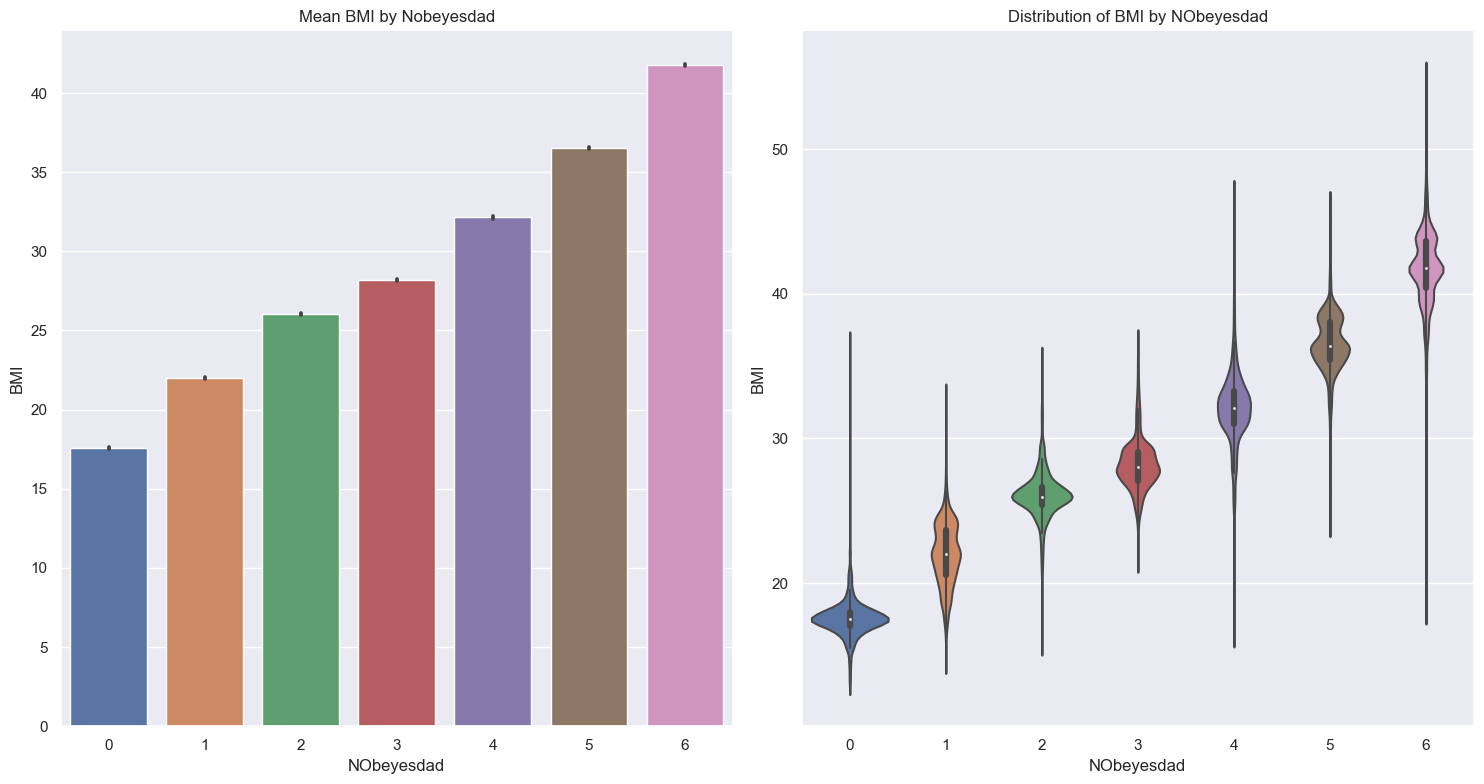

In [28]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 8))
sns.barplot(data=df_train, y='BMI', x='NObeyesdad', ax=axes[0])
axes[0].set_title("Mean BMI by Nobeyesdad")
sns.violinplot(data=df_train, y='BMI', x='NObeyesdad', ax=axes[1])
axes[1].set_title("Distribution of BMI by NObeyesdad")
plt.tight_layout()
plt.show()

On average, the BMI is the highest among people with Obesity type III and the lowest among people with Insufficient weight.
Moreover, there is a high variability of the BMI in each category.

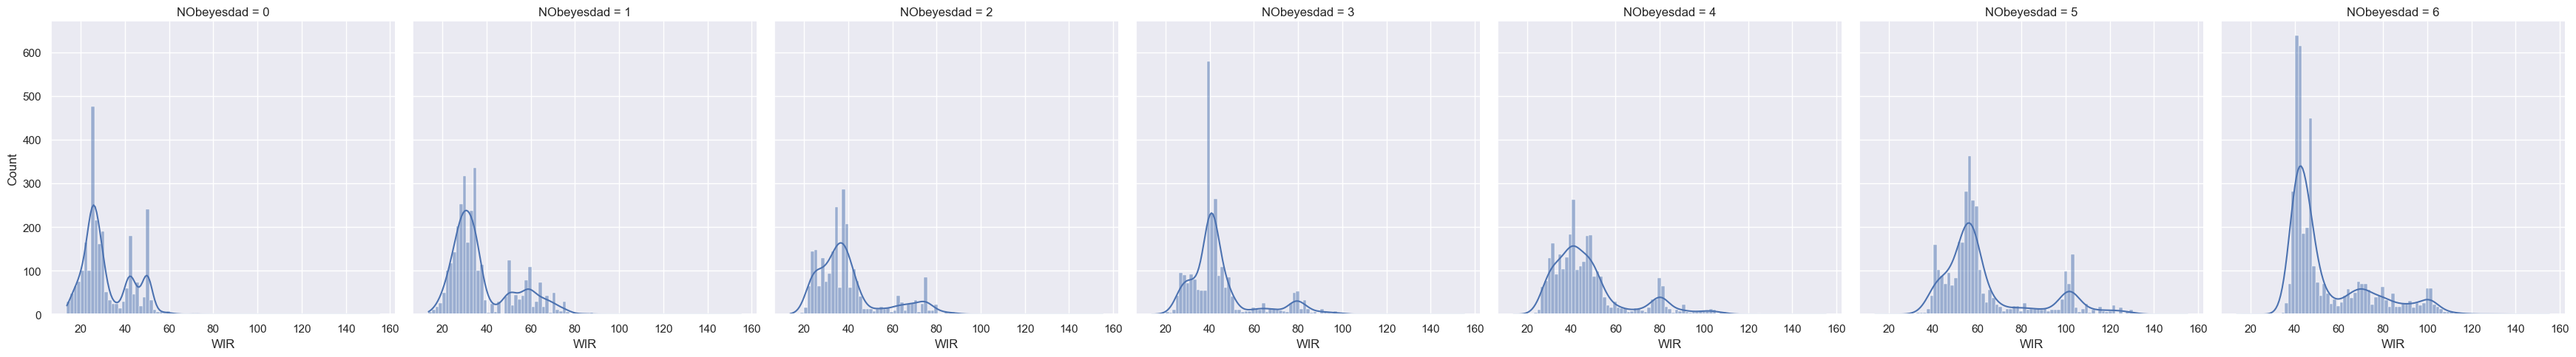

In [29]:
sns.displot(data=df_train, x="WIR", col="NObeyesdad", kde=True)
plt.show()

## Preprocessing

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import randint

In [31]:
X = df_train.drop(['NObeyesdad'], axis=1)
y = df_train['NObeyesdad']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (16606, 18)
X_test shape: (4152, 18)
y_train shape: (16606,)
y_test shape: (4152,)


In [34]:
# Standardize the features 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Model building

We will compare the performance of 4 different models :
* Random Forest Classifier
* Support Vector Classifier
* K Nearest Neighbors
* Logistic Regression

In [35]:
classifiers = [RandomForestClassifier(random_state=42),
               SVC(random_state=42),
               KNeighborsClassifier(),
               LogisticRegression(max_iter=1000, random_state=42)
               ]
accuracies = []
all_predictions = pd.DataFrame({'id': y_test.index})

for classifier in classifiers:
    # Train the model
    classifier.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = classifier.predict(X_test)
    all_predictions[classifier.__class__.__name__] = y_pred

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

    # Print model name and metrics
    print(f"{'='*30}\n{classifier.__class__.__name__}\n{'='*30}")
    print(f'Accuracy: {accuracy:.5f}')
    print('\nClassification Report:')
    print(classification_report(y_test, y_pred))
    print('\n')

RandomForestClassifier
Accuracy: 0.89644

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.93      0.93       524
           1       0.85      0.87      0.86       626
           2       0.75      0.76      0.76       484
           3       0.80      0.80      0.80       514
           4       0.88      0.87      0.88       543
           5       0.97      0.97      0.97       657
           6       1.00      1.00      1.00       804

    accuracy                           0.90      4152
   macro avg       0.89      0.89      0.89      4152
weighted avg       0.90      0.90      0.90      4152



SVC
Accuracy: 0.87331

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.92      0.91       524
           1       0.84      0.82      0.83       626
           2       0.70      0.75      0.72       484
           3       0.74      0.73      0.74       514
           4       

In [36]:
y_test_df = pd.DataFrame(y_test).reset_index()
y_test_df.rename(columns={'index': 'id'}, inplace=True)
pd.merge(all_predictions, y_test_df, on='id')

,id,RandomForestClassifier,SVC,KNeighborsClassifier,LogisticRegression,NObeyesdad
0,10317,6,6,6,6,6
1,4074,2,2,1,2,2
2,9060,4,4,4,4,4
3,11286,5,5,5,5,5
4,8254,1,0,1,0,0
...,...,...,...,...,...,...
4147,20286,1,1,1,1,1
4148,8233,4,4,2,4,4
4149,11518,4,4,4,4,4
4150,7947,2,3,3,3,2


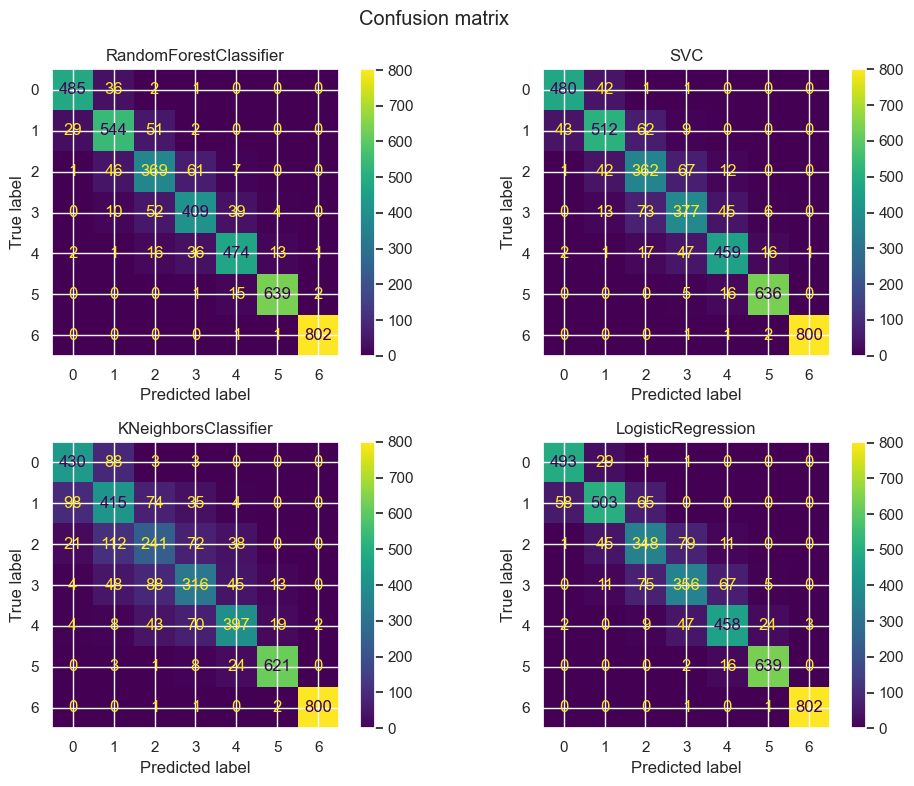

In [37]:
# Plot confusion matrix
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
axes = axes.flatten()
for i, classifier in enumerate(classifiers):
    cm = confusion_matrix(y_test, all_predictions.loc[:, [classifier.__class__.__name__]])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(ax=axes[i])
    axes[i].set_title(classifier.__class__.__name__)
plt.suptitle('Confusion matrix')
plt.tight_layout()
plt.show()

| Model | Accuracy |
|:------|:---------|
| RandomForestClassifier | 0.89644 |
| SVC |0.87331 |
| KNeighborsClassifier | 0.77553 |
| LogisticRegression | 0.86681 |

The Random Forest Classifier has the best accuracy.

## Hyperparameter tuning for RandomForestClassifier

The hyperparameters we will tune are :
* **n_estimators :** the number of decision trees in the forest (default=100). Increasing this hyperparameter generally improves the performance of the model but also increases the computational cost of training and predicting.
* **max_depth :** the maximum depth of each decision tree in the forest (default=None). Setting a higher value for max_depth can lead to overfitting while setting it too low can lead to underfitting.

In [41]:
param_dist = {
    'n_estimators': randint(100, 500),
    'max_depth': randint(1,20)
}

rf = RandomForestClassifier(random_state=42)
# Use random search to find the best hyperparameters
random_search = RandomizedSearchCV(estimator=rf, 
                                   param_distributions=param_dist,
                                   n_iter=10,
                                   cv=3,
                                   verbose=2,
                                   random_state=42)
# Fit the random search object to the data
random_search.fit(X_train, y_train)
best_rf = random_search.best_estimator_

print('Best hyperparameters:',  random_search.best_params_)
print("Best score:", random_search.best_score_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END ......................max_depth=7, n_estimators=448; total time=   6.7s
[CV] END ......................max_depth=7, n_estimators=448; total time=   6.7s
[CV] END ......................max_depth=7, n_estimators=448; total time=   6.5s
[CV] END .....................max_depth=15, n_estimators=206; total time=   5.2s
[CV] END .....................max_depth=15, n_estimators=206; total time=   5.2s
[CV] END .....................max_depth=15, n_estimators=206; total time=   5.4s
[CV] END ......................max_depth=8, n_estimators=288; total time=   4.9s
[CV] END ......................max_depth=8, n_estimators=288; total time=   4.9s
[CV] END ......................max_depth=8, n_estimators=288; total time=   4.8s
[CV] END ......................max_depth=7, n_estimators=221; total time=   3.3s
[CV] END ......................max_depth=7, n_estimators=221; total time=   3.3s
[CV] END ......................max_depth=7, n_es

In [42]:
best_rf.fit(X_train, y_train)
y_pred = best_rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.5f}')

Accuracy: 0.90005


## Submission

In [43]:
id = df_test['id']
df_test = df_test.drop(columns = "id")
df_test = encode_categorical(df_test)
df_test = create_new_features(df_test)
X_val = scaler.transform(df_test)

In [44]:
y_val_pred = best_rf.predict(X_val)

In [45]:
df_sub = pd.DataFrame({'id': id, 'NObeyesdad': y_val_pred})

In [47]:
df_sub.replace({0: 'Insufficient_Weight',
                1: 'Normal_Weight',
                2: 'Overweight_Level_I',
                3: 'Overweight_Level_II',
                4: 'Obesity_Type_I',
                5: 'Obesity_Type_II',
                6: 'Obesity_Type_III'}, inplace=True)

In [48]:
df_sub

,id,NObeyesdad
0,20758,Obesity_Type_II
1,20759,Overweight_Level_I
2,20760,Obesity_Type_III
3,20761,Obesity_Type_I
4,20762,Obesity_Type_III
...,...,...
13835,34593,Overweight_Level_II
13836,34594,Normal_Weight
13837,34595,Insufficient_Weight
13838,34596,Normal_Weight


In [ ]:
df_sub.to_csv('submission.csv', index=False)